/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006/ch05
/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006
/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006
/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006
========== iteration: 0 ==========
SGD: 2.579508216828795
Momentum: 2.341730008902661
AdaGrad: 1.9139555507305404
Adam: 2.1659969865229844
========== iteration: 100 ==========
SGD: 1.5705430763660213
Momentum: 0.43414165355076917
AdaGrad: 0.17201962218653563
Adam: 0.32756886121062856
========== iteration: 200 ==========
SGD: 0.7829607229978222
Momentum: 0.173450900159551
AdaGrad: 0.09819939818224932
Adam: 0.15264441435741644
========== iteration: 300 ==========
SGD: 0.5325257771607357
Momentum: 0.14583790604020108
AdaGrad: 0.04247783247719064
Adam: 0.07836507172007884
========== iteration: 400 ==========
SGD: 0.41278751089721677
Momentum: 0.14

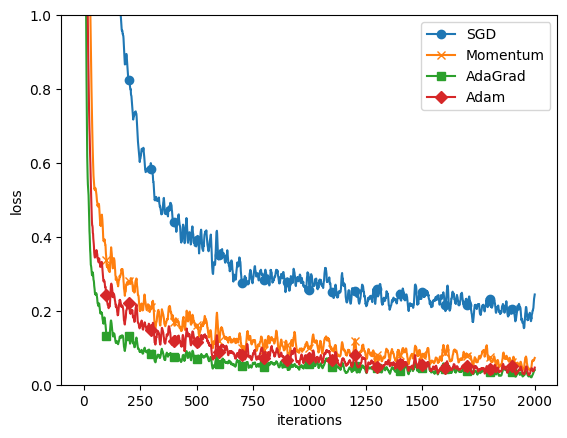

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)
import os, sys
print(os.getcwd())  # 현재 작업 디렉토리 출력
current_dir = os.path.dirname(os.path.abspath("/mnt/batch/tasks/shared/LS_root/mounts/clusters/b001-dl/code/Users/5b001/DL3_20241006/common"))  # 현재 파일의 디렉토리 경로 가져오기
print(current_dir)  # 디렉토리 경로 출력
os.chdir(current_dir)  # 현재 디렉토리로 변경

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist  # MNIST 데이터셋 로드
from common.util import smooth_curve  # 그래프를 매끄럽게 만드는 함수
from common.multi_layer_net import MultiLayerNet  # 신경망 클래스
from common.optimizer import *  # Optimizer 관련 모듈 import

# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)  # MNIST 데이터셋 로드
train_size = x_train.shape[0]
batch_size = 128  # 배치 사이즈 설정
max_iterations = 2000  # 최대 반복 횟수

# 1. Optimizer 설정
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}

# 각 Optimizer 별로 MultiLayerNet 신경망 생성
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
    train_loss[key] = []

# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)  # 무작위로 배치 추출
    x_batch = x_train[batch_mask]  # 배치 입력 데이터
    t_batch = t_train[batch_mask]  # 배치 타겟 데이터

    for key in optimizers.keys():
        # 기울기 계산
        grads = networks[key].gradient(x_batch, t_batch)
        # Optimizer 별로 파라미터 업데이트
        optimizers[key].update(networks[key].params, grads)

        # 손실 계산 및 기록
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:  # 100번마다 출력
        print("========== iteration: " + str(i) + " ==========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ": " + str(loss))

# 3. 그래프 그리기
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)  # x 축은 반복 횟수

# 손실 곡선 그리기
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
